<a href="https://colab.research.google.com/github/UniVR-DH/DKR-course/blob/main/L12-SPARQL/Sparql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDF & SPARQL

Original source code derived from <a href="https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Sparql.ipynb" target="_parent">joerg84/Graph_Powered_ML_Workshop</a>

In this notebook we will explore basic RDF and SPARQL queries.

# Setup Environment

In [5]:
%%capture
!pip3 install rdflib sparqlwrapper pydotplus graphviz

In [25]:
import rdflib
import rdflib.plugins.sparql
from rdflib import Graph, ConjunctiveGraph, Dataset
from rdflib.namespace import DC, RDF, FOAF, RDFS
from rdflib import URIRef, BNode, Literal
import networkx as nx
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [54]:
rdflib.plugins.sparql.SPARQL_DEFAULT_GRAPH_UNION = False
rdflib.plugins.sparql.SPARQL_LOAD_GRAPHS = False

In [3]:
# Helper function for vizualizing RDF graph
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

# First Graph

In [ ]:
g = Graph()
# Graph using TTL syntax
TTLdata = """\
@prefix schema: <http://schema.org/> .
@prefix loc: <http://localhost:8080/data/person/> .

loc:amy-farrah-fowler
  a schema:Person ;
  schema:additionalName "Farrah" ;
  schema:familyName "Fowler" ;
  schema:givenName "Amy" ;
  schema:jobTitle "neurobiologist" ;
  schema:knows loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:bernadette-rostenkowski
  a schema:Person ;
  schema:additionalName "Maryann" ;
  schema:familyName "Rostenkowski-Wolowitz" ;
  schema:givenName "Bernadette" ;
  schema:jobTitle "microbiologist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom;
  schema:spouse loc:howard-wolowitz .

loc:howard-wolowitz
  a schema:Person ;
  schema:additionalName "Joel" ;
  schema:familyName "Wolowitz" ;
  schema:givenName "Howard" ;
  schema:jobTitle "aerospace engineer" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom;
  schema:spouse loc:bernadette-rostenkowski .

loc:leonard-hofstadter
  a schema:Person ;
  schema:additionalName "Leakey" ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressLocality "Pasadena" ;
    schema:addressRegion "CA" ;
    schema:postalCode "91104" ;
    schema:streetAddress "2311 North Los Robles Avenue, Apartment 4A"
  ] ;
  schema:familyName "Hofstadter" ;
  schema:givenName "Leonard" ;
  schema:jobTitle "experimental physicist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:mary-cooper,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:mary-cooper
  a schema:Person ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressRegion "TX"
  ] ;
  schema:children loc:sheldon-cooper ;
  schema:familyName "Cooper" ;
  schema:givenName "Mary" ;
  schema:knows loc:howard-wolowitz,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper .

loc:penny
  a schema:Person ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressLocality "Pasadena" ;
    schema:addressRegion "CA" ;
    schema:postalCode "91104" ;
    schema:streetAddress "2311 North Los Robles Avenue, Apartment 4B"
  ] ;
  schema:givenName "Penny" ;
  schema:jobTitle "pharmaceutical sales representative" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:rajesh-koothrappali
  a schema:Person ;
  schema:additionalName "Ramayan Raj" ;
  schema:familyName "Koothrappali" ;
  schema:givenName "Rajesh" ;
  schema:jobTitle "astrophysicist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:sheldon-cooper
  a schema:Person ;
  schema:additionalName "Lee" ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressLocality "Pasadena" ;
    schema:addressRegion "CA" ;
    schema:postalCode "91104" ;
    schema:streetAddress "2311 North Los Robles Avenue, Apartment 4A"
  ] ;
  schema:familyName "Cooper" ;
  schema:givenName "Sheldon" ;
  schema:jobTitle "theoretical physicist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:stuart-bloom ;
  schema:parent loc:mary-cooper .

loc:stuart-bloom
  a schema:Person ;
  schema:familyName "Bloom" ;
  schema:givenName "Stuart" ;
  schema:jobTitle "comic book store owner" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper ."""
g.parse(data=TTLdata, format="ttl")

<Graph identifier=N79d6a6d146764206a428e90c983ca4db (<class 'rdflib.graph.Graph'>)>

Let us print 20 tripes:

In [ ]:
#print all triples
count=0
for s, p, o in g:
   print((s, p, o))
   count+=1
   if count >20:
    break

(rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b3'), rdflib.term.URIRef('http://schema.org/addressRegion'), rdflib.term.Literal('CA'))
(rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b1'), rdflib.term.URIRef('http://schema.org/addressCountry'), rdflib.term.Literal('US'))
(rdflib.term.URIRef('http://localhost:8080/data/person/mary-cooper'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/sheldon-cooper'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/amy-farrah-fowler'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/bernadette-rostenkowski'))
(rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b4'), rdflib.term.URIRef('http://schema.org/postalCode'), rdflib.term

As this is hard to read, let us visualize the RDF graph:

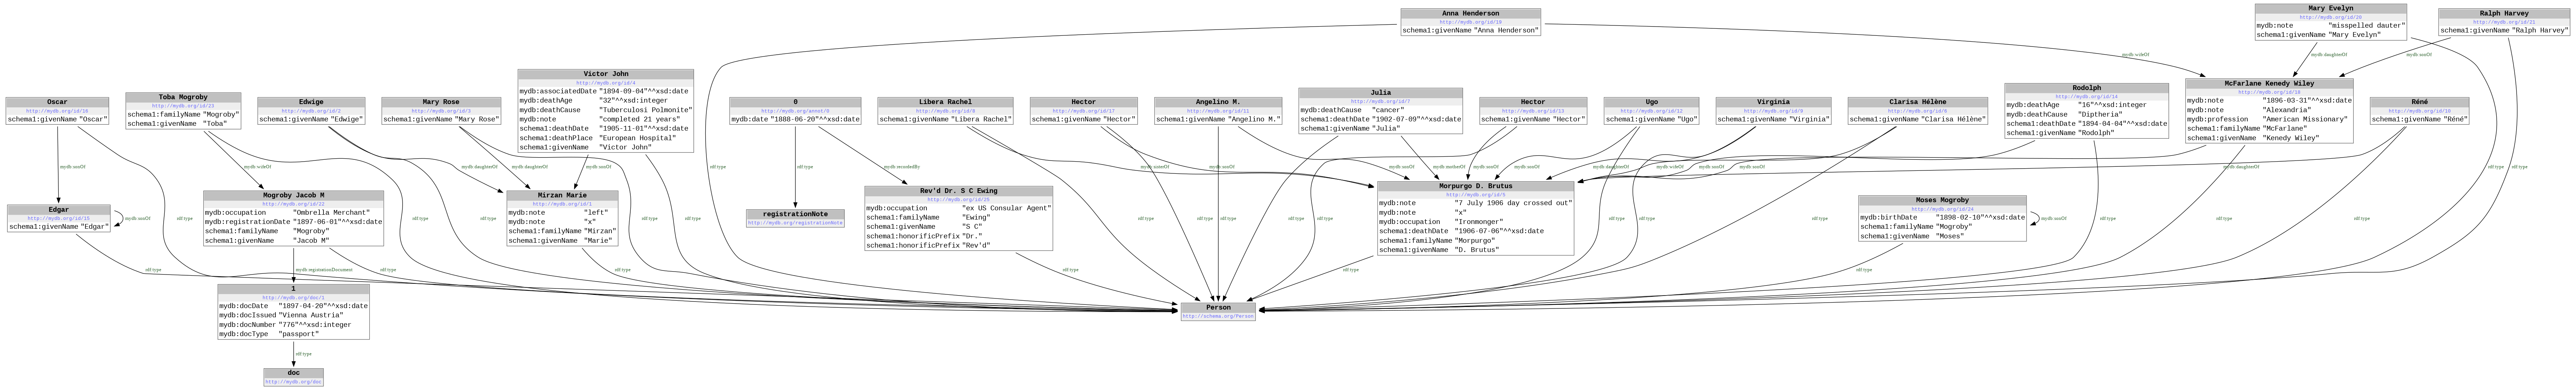

In [ ]:
visualize(g)


As we have global identifiers we an also look up facts (triples) about a specific entity:

In [ ]:
# Lookup Penny by global identifier
penny = URIRef('http://localhost:8080/data/person/penny')
for o in g.predicate_objects(subject=penny):
  print(o)

(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://schema.org/Person'))
(rdflib.term.URIRef('http://schema.org/address'), rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b3'))
(rdflib.term.URIRef('http://schema.org/givenName'), rdflib.term.Literal('Penny'))
(rdflib.term.URIRef('http://schema.org/jobTitle'), rdflib.term.Literal('pharmaceutical sales representative'))
(rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/amy-farrah-fowler'))
(rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/bernadette-rostenkowski'))
(rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'))
(rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/leonard-hofstadter'))
(rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localho

# SPARQL

SPARQL allows us to query our graph using a SQL like language:

In [ ]:
# list all facts (triples)
result = g.query(
    """SELECT ?s ?p ?o
  WHERE
  {?s ?p ?o}
  LIMIT 20
""")

# Output result
for row in result:
    print(row)


(rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b3'), rdflib.term.URIRef('http://schema.org/addressRegion'), rdflib.term.Literal('CA'))
(rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b1'), rdflib.term.URIRef('http://schema.org/addressCountry'), rdflib.term.Literal('US'))
(rdflib.term.URIRef('http://localhost:8080/data/person/mary-cooper'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/sheldon-cooper'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/amy-farrah-fowler'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/bernadette-rostenkowski'))
(rdflib.term.BNode('n01d3fdee80104d6f979e5927ab8f9f84b4'), rdflib.term.URIRef('http://schema.org/postalCode'), rdflib.term

We can leverage URIs, variables, and predicates to specify pattern we are looking for. In this case we want to idenify all pairs of people knowing each other.

In [ ]:
result = g.query(
    """SELECT ?aname ?bname
       WHERE {
          ?a schema:knows ?b .
          ?a schema:givenName ?aname .
          ?b schema:givenName ?bname .
       }""",
    initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s knows %s" % row)

Amy knows Bernadette
Howard knows Bernadette
Leonard knows Bernadette
Penny knows Bernadette
Rajesh knows Bernadette
Sheldon knows Bernadette
Stuart knows Bernadette
Amy knows Howard
Bernadette knows Howard
Leonard knows Howard
Mary knows Howard
Penny knows Howard
Rajesh knows Howard
Sheldon knows Howard
Stuart knows Howard
Amy knows Leonard
Bernadette knows Leonard
Howard knows Leonard
Penny knows Leonard
Rajesh knows Leonard
Sheldon knows Leonard
Stuart knows Leonard
Amy knows Penny
Bernadette knows Penny
Howard knows Penny
Leonard knows Penny
Mary knows Penny
Rajesh knows Penny
Sheldon knows Penny
Stuart knows Penny
Amy knows Rajesh
Bernadette knows Rajesh
Howard knows Rajesh
Leonard knows Rajesh
Mary knows Rajesh
Penny knows Rajesh
Sheldon knows Rajesh
Stuart knows Rajesh
Amy knows Sheldon
Bernadette knows Sheldon
Howard knows Sheldon
Leonard knows Sheldon
Mary knows Sheldon
Penny knows Sheldon
Rajesh knows Sheldon
Stuart knows Sheldon
Amy knows Stuart
Bernadette knows Stuart
Howar

In [ ]:
result = g.query(
    """SELECT (COUNT(*) as ?count)
       WHERE {
          ?a schema:knows ?b .
       }""", initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s" % row)

61


In [ ]:
result = g.query(
    """SELECT  ?a ?b
       WHERE {
          ?a schema:knows ?b .
          FILTER NOT EXISTS { ?b schema:knows ?a . } .
       }""", initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s knows %s not reciprocated" % row)

http://localhost:8080/data/person/mary-cooper knows http://localhost:8080/data/person/howard-wolowitz not reciprocated
http://localhost:8080/data/person/mary-cooper knows http://localhost:8080/data/person/penny not reciprocated
http://localhost:8080/data/person/mary-cooper knows http://localhost:8080/data/person/rajesh-koothrappali not reciprocated
http://localhost:8080/data/person/mary-cooper knows http://localhost:8080/data/person/sheldon-cooper not reciprocated
http://localhost:8080/data/person/leonard-hofstadter knows http://localhost:8080/data/person/mary-cooper not reciprocated


# Second Graph

In [55]:
g = Graph()
# Graph using TTL syntax
TTLdata = """\
@prefix mydb: 	<http://mydb.org/> .
@prefix schema:	<http://schema.org/> .
@prefix rdf:	<http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs:	<http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://mydb.org/id/1> a schema:Person ;
	rdfs:label "Mirzan Marie" ;
	schema:givenName "Marie" ;
	schema:familyName "Mirzan" ;
	mydb:note "left" ;
	mydb:note "x" .

<http://mydb.org/id/2> a schema:Person ;
	rdfs:label "Edwige" ;
	schema:givenName "Edwige" ;
	mydb:daughterOf <http://mydb.org/id/1> .

<http://mydb.org/id/3> a schema:Person ;
	rdfs:label "Mary Rose" ;
	schema:givenName "Mary Rose" ;
	mydb:daughterOf <http://mydb.org/id/1> .

<http://mydb.org/id/4> a schema:Person ;
	rdfs:label "Victor John" ;
	schema:givenName "Victor John" ;
	mydb:sonOf <http://mydb.org/id/1> ;
	mydb:associatedDate "1894-09-04"^^xsd:date ;
	mydb:note "completed 21 years" ;
	schema:deathDate "1905-11-01"^^xsd:date ;
	mydb:deathAge 32 ;
	schema:deathPlace "European Hospital" ;
	mydb:deathCause	"Tuberculosi Polmonite" .

<http://mydb.org/id/5> a schema:Person ;
	rdfs:label "Morpurgo D. Brutus" ;
	schema:familyName "Morpurgo" ;
	schema:givenName "D. Brutus" ;
	mydb:note "x" ;
	mydb:occupation "Ironmonger" ;
	schema:deathDate "1906-07-06"^^xsd:date ;
	mydb:note "7 July 1906 day crossed out".

<http://mydb.org/id/6> a schema:Person ;
	rdfs:label "Clarisa Hélène" ;
	schema:givenName "Clarisa Hélène" ;
	mydb:wifeOf <http://mydb.org/id/5> .

<http://mydb.org/id/7> a schema:Person ;
	rdfs:label "Julia" ;
	schema:givenName "Julia" ;
	mydb:motherOf <http://mydb.org/id/5> ;
	schema:deathDate "1902-07-09"^^xsd:date ;
	mydb:deathCause	"cancer" .

<http://mydb.org/id/8> a schema:Person ;
	rdfs:label "Libera Rachel" ;
	schema:givenName "Libera Rachel" ;
	mydb:sisterOf <http://mydb.org/id/5> .

<http://mydb.org/id/9> a schema:Person ;
	rdfs:label "Virginia" ;
	schema:givenName "Virginia" ;
	mydb:daughterOf <http://mydb.org/id/5> .

<http://mydb.org/id/10> a schema:Person ;
	rdfs:label "Réné" ;
	schema:givenName "Réné" ;
	mydb:daughterOf <http://mydb.org/id/5> .

<http://mydb.org/id/11> a schema:Person ;
	rdfs:label "Angelino M." ;
	schema:givenName "Angelino M." ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/12> a schema:Person ;
	rdfs:label "Ugo" ;
	schema:givenName "Ugo" ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/13> a schema:Person ;
	rdfs:label "Hector" ;
	schema:givenName "Hector" ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/14> a schema:Person ;
	rdfs:label "Rodolph" ;
	schema:givenName "Rodolph" ;
	mydb:sonOf <http://mydb.org/id/5> ;
	schema:deathDate "1894-04-04"^^xsd:date ;
	mydb:deathAge 16 ;
	mydb:deathCause	"Diptheria" .

<http://mydb.org/id/15> a schema:Person ;
	rdfs:label "Edgar" ;
	schema:givenName "Edgar" ;
	mydb:sonOf <http://mydb.org/id/15> .

<http://mydb.org/id/16> a schema:Person ;
	rdfs:label "Oscar" ;
	schema:givenName "Oscar" ;
	mydb:sonOf <http://mydb.org/id/15> .

<http://mydb.org/id/17> a schema:Person ;
	rdfs:label "Hector" ;
	schema:givenName "Hector" ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/18> a schema:Person ;
	rdfs:label "McFarlane Kenedy Wiley" ;
  mydb:sonOf <http://mydb.org/id/5> ;
	schema:familyName "McFarlane" ;
	schema:givenName "Kenedy Wiley" ;
	mydb:profession "American Missionary" ;
	mydb:note "Alexandria" ;
	mydb:note "1896-03-31"^^xsd:date .

<http://mydb.org/id/19> a schema:Person ;
	rdfs:label "Anna Henderson" ;
	schema:givenName "Anna Henderson" ;
	mydb:wifeOf <http://mydb.org/id/18> .

<http://mydb.org/id/20> a schema:Person ;
	rdfs:label "Mary Evelyn" ;
	schema:givenName "Mary Evelyn" ;
	mydb:daughterOf <http://mydb.org/id/18> ;
	mydb:note "misspelled dauter" .

<http://mydb.org/id/21> a schema:Person ;
	rdfs:label "Ralph Harvey" ;
	schema:givenName "Ralph Harvey" ;
	mydb:sonOf <http://mydb.org/id/18> .

<http://mydb.org/id/22> a schema:Person ;
	rdfs:label "Mogroby Jacob M" ;
	schema:familyName "Mogroby" ;
	schema:givenName "Jacob M" ;
	mydb:occupation "Ombrella Merchant" ;
	mydb:registrationDate "1897-06-01"^^xsd:date ;
	mydb:registrationDocument <http://mydb.org/doc/1> .

<http://mydb.org/doc/1> a mydb:doc ;
	mydb:docType "passport" ;
	mydb:docNumber 776 ;
	mydb:docDate "1897-04-20"^^xsd:date ;
	mydb:docIssued "Vienna Austria" .

<http://mydb.org/id/23> a schema:Person ;
	rdfs:label "Toba Mogroby" ;
	schema:familyName "Mogroby" ;
	schema:givenName "Toba" ;
	mydb:wifeOf	<http://mydb.org/id/22> .

<http://mydb.org/id/24> a schema:Person ;
	rdfs:label "Moses Mogroby" ;
	schema:familyName "Mogroby" ;
	schema:givenName "Moses" ;
	mydb:sonOf <http://mydb.org/id/24> ;
	mydb:birthDate "1898-02-10"^^xsd:date .

<http://mydb.org/annot/0> a mydb:registrationNote ;
	mydb:recordedBy <http://mydb.org/id/25> ;
	mydb:date "1888-06-20"^^xsd:date .

<http://mydb.org/id/25> a schema:Person ;
	rdfs:label "Rev'd Dr. S C Ewing" ;
	schema:familyName "Ewing" ;
	schema:givenName "S C" ;
	schema:honorificPrefix "Rev'd" ;
	schema:honorificPrefix "Dr." ;
	mydb:occupation "ex US Consular Agent" .
"""
g.parse(data=TTLdata, format="ttl")

<Graph identifier=Ne4f57ec6684c451e97ca111e8386f2ec (<class 'rdflib.graph.Graph'>)>

In [56]:
result = g.query(
    """SELECT  ?name ?b
       WHERE {
          ?a schema:givenName  ?name .
          ?a schema:deathDate   ?b .

       }""",
    initNs={ 'mydb': 'http://mydb.org/', 'schema':'http://schema.org/' })

# Output result
for row in result:
    print("{} {}".format(row[0], row[1]))

Victor John 1905-11-01
D. Brutus 1906-07-06
Julia 1902-07-09
Rodolph 1894-04-04


In [15]:
result = g.query(
    """SELECT  ?name
       WHERE {
          ?a schema:givenName  ?name .
          FILTER( regex(?name, "^M"))

       }""",
    initNs={ 'mydb': 'http://mydb.org/', 'schema':'http://schema.org/' })

# Output result
for row in result:
    print("{}".format(row[0]))

Marie
Mary Rose
Mary Evelyn
Moses


In [16]:
result = g.query(
    """SELECT ?a ?name
       WHERE {
          ?a schema:givenName  ?name .
          ?a (mydb:daughterOf|mydb:sonOf) ?a

       }""",
    initNs={ 'mydb': 'http://mydb.org/', 'schema':'http://schema.org/' })

# Output result
for row in result:
    print("{} {}".format(row[0], row[1]))

http://mydb.org/id/15 Edgar
http://mydb.org/id/24 Moses


In [25]:
result = g.query(
    """SELECT ?b ?bname
       WHERE {
          ?a rdfs:label  "Morpurgo D. Brutus" .
          ?b (mydb:daughterOf|mydb:sonOf)+ ?a .
          ?b schema:givenName ?bname .
          FILTER ( ?b = <http://mydb.org/id/11> )
       } ORDER BY ?bname ?b """,
    initNs={ 'mydb': 'http://mydb.org/', 'schema':'http://schema.org/' })

# Output result
for row in result:
    print("{} {}".format(row[0], row[1]))

http://mydb.org/id/11 Angelino M.


# Third Graph

In [69]:
g = ConjunctiveGraph()
# Graph using TTL syntax
TRIGdata = """\
@prefix mydb: 	<http://mydb.org/> .
@prefix schema:	<http://schema.org/> .
@prefix rdf:	<http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs:	<http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .


mydb:graph1 {

<http://mydb.org/id/1> a schema:Person ;
	rdfs:label "Mirzan Marie" ;
	schema:givenName "Marie" ;
	schema:familyName "Mirzan" ;
	mydb:note "left" ;
	mydb:note "x" .

<http://mydb.org/id/2> a schema:Person ;
	rdfs:label "Edwige" ;
	schema:givenName "Edwige" ;
	mydb:daughterOf <http://mydb.org/id/1> .

<http://mydb.org/id/3> a schema:Person ;
	rdfs:label "Mary Rose" ;
	schema:givenName "Mary Rose" ;
	mydb:daughterOf <http://mydb.org/id/1> .

<http://mydb.org/id/4> a schema:Person ;
	rdfs:label "Victor John" ;
	schema:givenName "Victor John" ;
	mydb:sonOf <http://mydb.org/id/1> ;
	mydb:associatedDate "1894-09-04"^^xsd:date ;
	mydb:note "completed 21 years" ;
	schema:deathDate "1905-11-01"^^xsd:date ;
	mydb:deathAge 32 ;
	schema:deathPlace "European Hospital" ;
	mydb:deathCause	"Tuberculosi Polmonite" .

<http://mydb.org/id/5> a schema:Person ;
	rdfs:label "Morpurgo D. Brutus" ;
	schema:familyName "Morpurgo" ;
	schema:givenName "D. Brutus" ;
	mydb:note "x" ;
	mydb:occupation "Ironmonger" ;
	schema:deathDate "1906-07-06"^^xsd:date ;
	mydb:note "7 July 1906 day crossed out".


<http://mydb.org/id/11> a schema:Person ;
	rdfs:label "Angelino M." ;
	schema:givenName "Angelino M." ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/6> a schema:Person ;
	rdfs:label "Clarisa Hélène" ;
	schema:givenName "Clarisa Hélène" ;
	mydb:wifeOf <http://mydb.org/id/5> .

<http://mydb.org/id/7> a schema:Person ;
	rdfs:label "Julia" ;
	schema:givenName "Julia" ;
	mydb:motherOf <http://mydb.org/id/5> ;
	schema:deathDate "1902-07-09"^^xsd:date ;
	mydb:deathCause	"cancer" .

}

<http://mydb.org/id/11> a schema:Actor .

<http://mydb.org/graph2> {

<http://mydb.org/id/8> a schema:Person ;
	rdfs:label "Libera Rachel" ;
	schema:givenName "Libera Rachel" ;
	mydb:sisterOf <http://mydb.org/id/5> .

<http://mydb.org/id/9> a schema:Person ;
	rdfs:label "Virginia" ;
	schema:givenName "Virginia" ;
	mydb:daughterOf <http://mydb.org/id/5> .

<http://mydb.org/id/10> a schema:Person ;
	rdfs:label "Réné" ;
	schema:givenName "Réné" ;
	mydb:daughterOf <http://mydb.org/id/5> .

<http://mydb.org/id/11> a schema:Person ;
	rdfs:label "Angelino M." ;
	schema:givenName "Angelino M." ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/12> a schema:Person ;
	rdfs:label "Ugo" ;
	schema:givenName "Ugo" ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/13> a schema:Person ;
	rdfs:label "Hector" ;
	schema:givenName "Hector" ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/14> a schema:Person ;
	rdfs:label "Rodolph" ;
	schema:givenName "Rodolph" ;
	mydb:sonOf <http://mydb.org/id/5> ;
	schema:deathDate "1894-04-04"^^xsd:date ;
	mydb:deathAge 16 ;
	mydb:deathCause	"Diptheria" .

<http://mydb.org/id/15> a schema:Person ;
	rdfs:label "Edgar" ;
	schema:givenName "Edgar" ;
	mydb:sonOf <http://mydb.org/id/15> .

<http://mydb.org/id/16> a schema:Person ;
	rdfs:label "Oscar" ;
	schema:givenName "Oscar" ;
	mydb:sonOf <http://mydb.org/id/15> .

<http://mydb.org/id/17> a schema:Person ;
	rdfs:label "Hector" ;
	schema:givenName "Hector" ;
	mydb:sonOf <http://mydb.org/id/5> .

<http://mydb.org/id/18> a schema:Person ;
	rdfs:label "McFarlane Kenedy Wiley" ;
  mydb:sonOf <http://mydb.org/id/5> ;
	schema:familyName "McFarlane" ;
	schema:givenName "Kenedy Wiley" ;
	mydb:profession "American Missionary" ;
	mydb:note "Alexandria" ;
	mydb:note "1896-03-31"^^xsd:date .

<http://mydb.org/id/19> a schema:Person ;
	rdfs:label "Anna Henderson" ;
	schema:givenName "Anna Henderson" ;
	mydb:wifeOf <http://mydb.org/id/18> .

<http://mydb.org/id/20> a schema:Person ;
	rdfs:label "Mary Evelyn" ;
	schema:givenName "Mary Evelyn" ;
	mydb:daughterOf <http://mydb.org/id/18> ;
	mydb:note "misspelled dauter" .

<http://mydb.org/id/21> a schema:Person ;
	rdfs:label "Ralph Harvey" ;
	schema:givenName "Ralph Harvey" ;
	mydb:sonOf <http://mydb.org/id/18> .

<http://mydb.org/id/22> a schema:Person ;
	rdfs:label "Mogroby Jacob M" ;
	schema:familyName "Mogroby" ;
	schema:givenName "Jacob M" ;
	mydb:occupation "Ombrella Merchant" ;
	mydb:registrationDate "1897-06-01"^^xsd:date ;
	mydb:registrationDocument <http://mydb.org/doc/1> .

<http://mydb.org/doc/1> a mydb:doc ;
	mydb:docType "passport" ;
	mydb:docNumber 776 ;
	mydb:docDate "1897-04-20"^^xsd:date ;
	mydb:docIssued "Vienna Austria" .

<http://mydb.org/id/23> a schema:Person ;
	rdfs:label "Toba Mogroby" ;
	schema:familyName "Mogroby" ;
	schema:givenName "Toba" ;
	mydb:wifeOf	<http://mydb.org/id/22> .

<http://mydb.org/id/24> a schema:Person ;
	rdfs:label "Moses Mogroby" ;
	schema:familyName "Mogroby" ;
	schema:givenName "Moses" ;
	mydb:sonOf <http://mydb.org/id/24> ;
	mydb:birthDate "1898-02-10"^^xsd:date .

<http://mydb.org/annot/0> a mydb:registrationNote ;
	mydb:recordedBy <http://mydb.org/id/25> ;
	mydb:date "1888-06-20"^^xsd:date .

<http://mydb.org/id/25> a schema:Person ;
	rdfs:label "Rev'd Dr. S C Ewing" ;
	schema:familyName "Ewing" ;
	schema:givenName "S C" ;
	schema:honorificPrefix "Rev'd" ;
	schema:honorificPrefix "Dr." ;
	mydb:occupation "ex US Consular Agent" .
}"""


<Graph identifier=Nd46f409aceed4bbabbd8ba5b22fd7473 (<class 'rdflib.graph.Graph'>)>

In [96]:
g = ConjunctiveGraph()
g.parse(data=TRIGdata, format="trig")

result = g.query(
    """SELECT (COUNT(?x)  AS ?c)

       WHERE {
         ?z a ?x
       }
       """,
    initNs={ 'mydb': 'http://mydb.org/', 'schema':'http://schema.org/' })

# Output result
for row in result:
    print("{}".format(row[0]))

1


In [97]:
g = ConjunctiveGraph()
g.parse(data=TRIGdata, format="trig")

result = g.query(
    """SELECT ?p (year(?aDate) as ?aYear)
       FROM <http://mydb.org/graph1>
       FROM <http://mydb.org/graph2>
       WHERE {
         ?z ?p  ?aDate . FILTER( isLiteral(?aDate) && datatype(?aDate) =xsd:date)
       }
       """,
    initNs={ 'mydb': 'http://mydb.org/', 'schema':'http://schema.org/' })

# Output result
for row in result:
    print("{} {}".format(row[0], row[1]))



http://mydb.org/registrationDate 1897
http://schema.org/deathDate 1906
http://mydb.org/docDate 1897
http://mydb.org/birthDate 1898
http://schema.org/deathDate 1902
http://schema.org/deathDate 1905
http://mydb.org/date 1888
http://mydb.org/note 1896
http://schema.org/deathDate 1894
http://mydb.org/associatedDate 1894
